# TP3 - exercice 2 : SVMs non linéaires et fonctions noyaux

Dans cet exercice nous verrons comment construire des SVM non linéaires en utilisant des fonctions noyaux ('kernels'). 
Nous travaillerons toujours à partir de la classe [**SVC**](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), et apprendrons à manipuler le noyau RBF (ou gaussien).

Nous travaillerons toujours à partir du jeu de données simulées **moon**, que l'on peut générer à partir de la fonction [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) du module **datasets** de scikit-learn. 

Le jeu de données **moons** étant en 2D, cet exercice sera également l'occasion d'apprendre à représenter les frontières de décision du modèle.

## Question 1.  Générer un jeu de données de taille 300 avec un niveau de bruit égal à 0.3 grâce à la fonction [make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) et le réprésenter.
* on pourra utiliser la fonction **scatter** du package *MatplotLib* pour représenter les points avec un code couleur reflétant leur catégorie.

In [1]:
# general imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

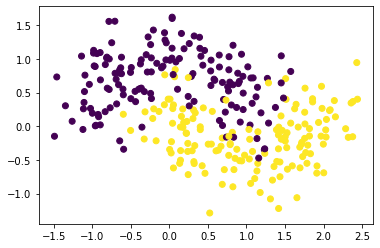

In [8]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=300, noise=0.3)

#Représentation
plt.scatter (X[:,0],X[:,1],c=y)

## Question 2.  Le code ci-dessous permet de représenter la frontière de décision du modèle qu'on lui donne en paramètre. L'utiliser pour représenter les frontières que l'on obtient avec un modèle SVM construit à partir d'un noyau linéaire ou d'un noyau à base radiale.
* on spéficie le noyau à utiliser via l'argument **kernel** du constructeur de la classe **SVC**, que l'on mettra ici à *kernel='linear'* ou *kernel='rbf'.
* on conservera les autres paramètres par défaut.

In [9]:
def show_model_decision(X, y, model) : 
    # define (x,y) grid
    x0_min = np.min(X[:,0])
    x0_max = np.max(X[:,0])
    x1_min = np.min(X[:,1])
    x1_max = np.max(X[:,1])
    xx, yy = np.meshgrid(np.linspace(x0_min-1, x0_max+1, 200), np.linspace(x1_min-1, x1_max+1, 200))
    # evaluate decision function in a grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # the ravel() function converts a 2D array in 1D
    Z = Z.reshape(xx.shape)
    # plot model score
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar()
    # plot classification boundary
    plt.contour(xx, yy, Z, 0, colors = 'k')
    # show data points
    plt.scatter(X[:,0], X[:,1], c = y)


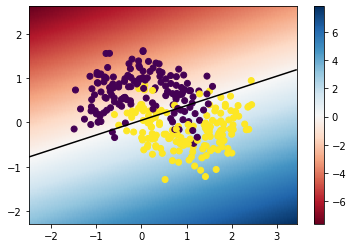

In [13]:
#représentation des frontières
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf.fit(X,y)
#clf2.fit(X,y)

show_model_decision(X,y,clf)

## Question 3.  Optimiser par validation croisée le paramètre $C$ du modèle à noyau linéaire en utilisant la classe *GridSearchCV*. Représenter le modèle obtenu.
* on rappelle qu'à l'issue de la procédure de validation, le modèle correspondant à la meilleure configuration (et appris sur l'intégralité des données d'apprentissage) est disponible dans le champ **best\_estimator\_** de l'objet **GridSearchCV**.
* on pourra prendre $C \in [10^{-3},10^3]$ avec des valeurs réparties de manière logarithmique.

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'decision_function_shape': ['ovr', 'ovo'],
    'C':np.logspace (-3,3, num = 10)
}

svm_clf = SVC(kernel='linear')
grid_search = GridSearchCV(svm_clf,param_grid, cv = 10)
grid_search.fit(X,y)

print("The best estimators are %s whith a score% 0.2f"
     % (grid_search.best_estimator_, grid_search.best_score_))

The best estimators are SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) whith a score 0.85


## Question 4.  Faire de même pour le modèle SVM non linéaire basé sur noyau radial, en optimisant cette fois ci le paramètre $C$ et le paramètre $\gamma$ du noyau. Quel noyau semble le plus adapté au problème ? Est-ce surprenant ?
* on pourra prendre comme précédemment $C \in [10^{-3},10^3]$ et $\gamma \in [0.1, 2]$ (en prenant $\gamma$ sur une grille linéaire).

In [32]:
from sklearn.model_selection import GridSearchCV

parm_grid = {
    
    'C': np.logspace (-3,3, num = 10),
    'gamma': np.arange(0.1,2.1,0.1)
}

svm_clf = SVC(kernel='rbf',gamma='auto')
grid_search = GridSearchCV(svm_clf,param_grid, cv = 10)
grid_search.fit(X,y)

print('The best estimators are %s whith a score% 0.2f'
     % (grid_search.best_estimator_, grid_search.best_score_))
    
    
   

The best estimators are SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) whith a score 0.91


## Question 5.  Reproduire cette analyse en optimisant à la fois le choix du noyau et de leurs paramètres dans une même procédure de validation croisée (i.e., dans un seul appel à la classe *GridSearchCV*). Obtenez-vous bien les mêmes résultats ? Qu'est ce qui pourrait expliquer des résultats (légèrement) différents ?

In [34]:


parm_grid = {
    
    'C': np.logspace (-3,3, num = 10),
    'gamma': np.arange(0.1,2.1,0.1),
    'kernel' : ['linear','rbf']
}

svm_clf = SVC(gamma='auto')
grid_search = GridSearchCV(svm_clf,param_grid, cv = 10)
grid_search.fit(X,y)

print('The best estimators are %s whith a score% 0.2f'
     % (grid_search.best_estimator_, grid_search.best_score_))
    
    

The best estimators are SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) whith a score 0.91


## Question 6 - pour aller plus loin.  Reproduire cette dernière analyse, en intégrant une étape de standardisation des descripteurs dans le processus de validation, via un "pipeline".